### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Load Required Packages
- Pandas for Data Loading
- sns & matplotlib for chart plotting
- NumPy

In [567]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

## Load data to Perform EDA

In [538]:
# Look at the top 10 rows of the data

boomBikeDataset = pd.read_csv('day.csv')
boomBikeDataset.head(10)

# Drop Casual & Registered columns & only use cnt as target variable. (As per problem statement)

boomBikeDataset.drop(['casual','registered'],axis = 1, inplace = True)
boomBikeDataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Replace string values for Categorical Variables
- Season
- Year

In [539]:
boomBikeDataset['season'] = np.where(boomBikeDataset['season'] == 1, 'spring',
                   np.where(boomBikeDataset['season'] == 2, 'summer',
                   np.where(boomBikeDataset['season'] == 3, 'fall', 'winter')))

boomBikeDataset['yearName'] = np.where(boomBikeDataset['yr'] == 1, '2019',
                   np.where(boomBikeDataset['yr'] == 0, '2018','2000'))

boomBikeDataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,yearName
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018


### Check for Metadata in the Data
- The dataset does not seem to have any null values & hence no need to drop any rows
- The total count of the rows are 730
- The total count of columns is 14
- Monday is 6 in Weekday
- Quick summary of the data

In [540]:
boomBikeDataset.describe()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Drop Columns with no assistance to Model Building
- instant: This column is the index and is unique, hence can be dropped
- Date column is unique across each row and hence can be dropped

In [541]:
boomBikeDataset.drop(['instant','dteday'],axis = 1, inplace = True)

In [542]:
boomBikeDataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,yearName
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018


### EDA to Understand Impact of Data on cnt
- As can be inferred from the below plot, temp & atemp are very closely correlated, hence one can be dropped
- The patterns followed across the year for the weather are same.
- Count is maximum when it is not a holiday & it follows the same pattern across the year

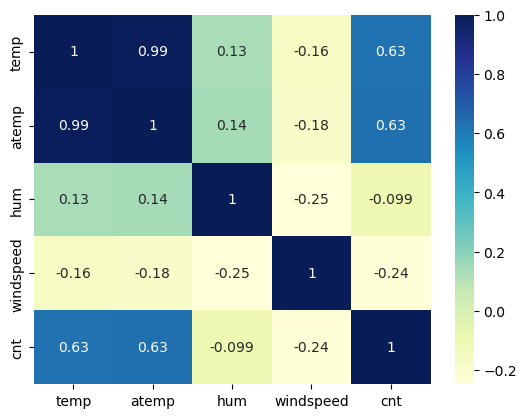

In [543]:
# Create a correlation plot

correlationData = boomBikeDataset[['temp','atemp','hum','windspeed','cnt']].corr()
dataplot = sns.heatmap(correlationData, cmap="YlGnBu", annot=True)
plt.show()

In [544]:
# Drop column atemp, as it is closely related to temp
boomBikeDataset.drop(['atemp'],axis = 1, inplace = True)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


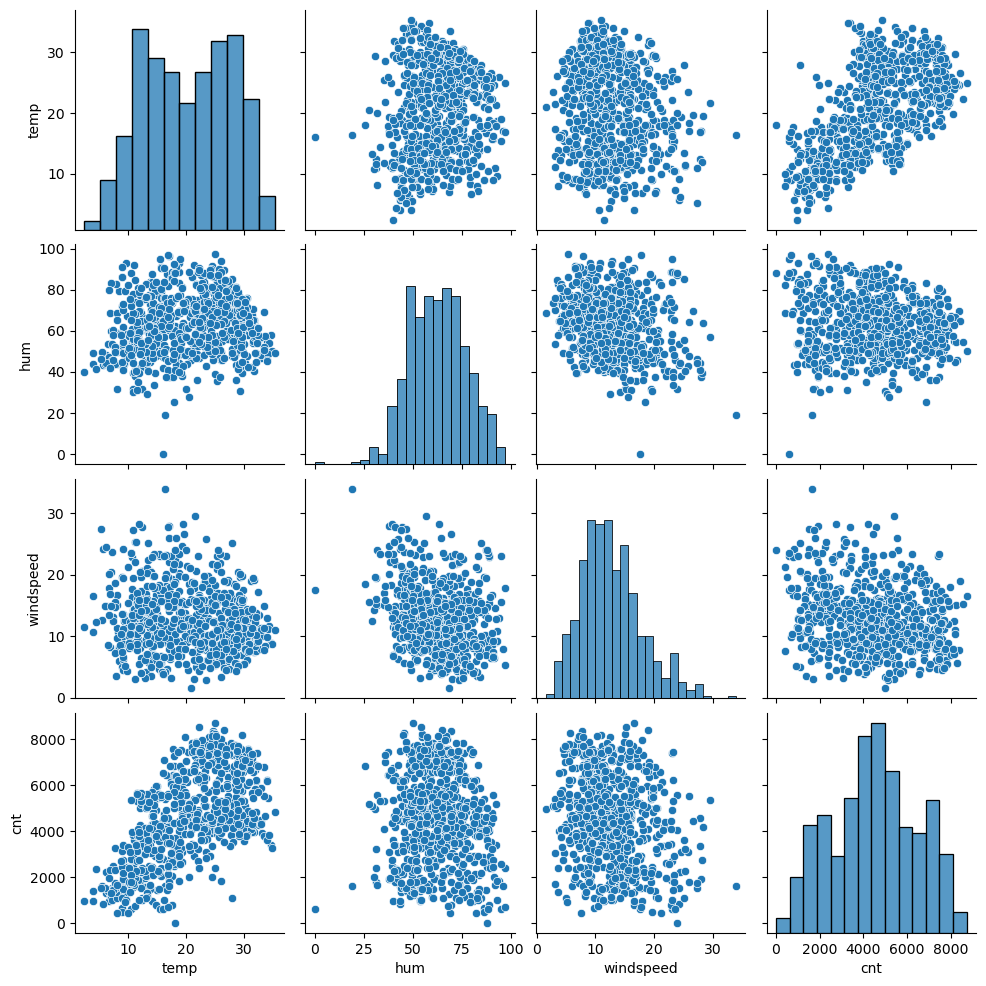

In [545]:
sns.pairplot(boomBikeDataset[['temp','hum','windspeed','cnt']])
plt.show()

### Inferences through Categorical Variables:

- There is no visible difference between the median of count of users when looking spread across WeekDay
- Similar to weekday, there is no visible difference for workingday

<Axes: xlabel='mnth', ylabel='cnt'>

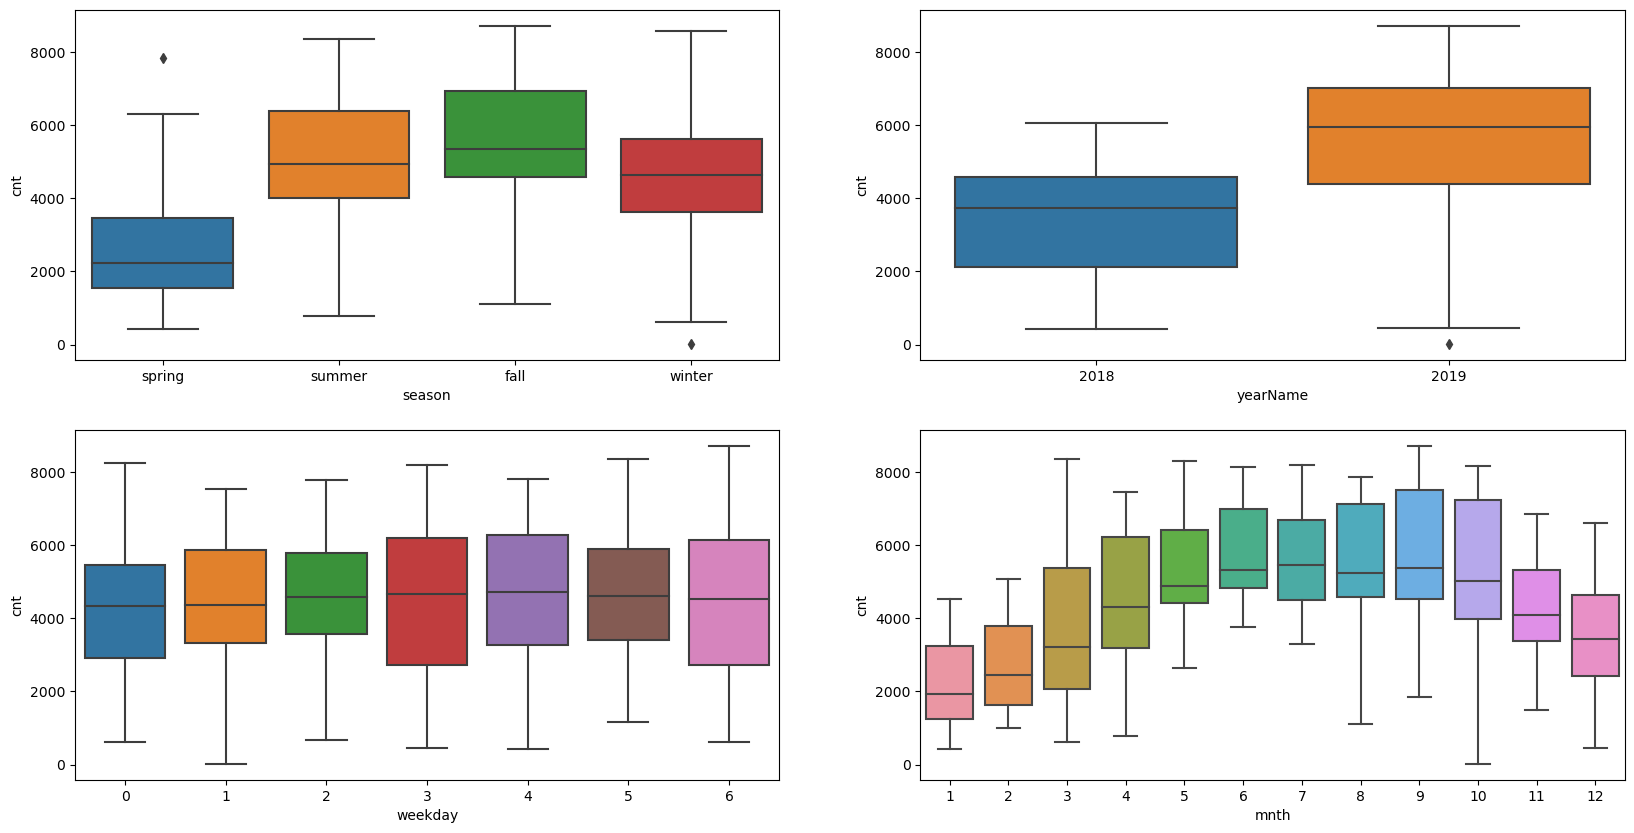

In [546]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.boxplot(data = boomBikeDataset, x = 'season', y = 'cnt')

plt.subplot(2,2,2)
sns.boxplot(data = boomBikeDataset, x = 'yearName', y = 'cnt')

plt.subplot(2,2,3)
sns.boxplot(data = boomBikeDataset, x = 'weekday', y = 'cnt')

plt.subplot(2,2,4)
sns.boxplot(data = boomBikeDataset, x = 'mnth', y = 'cnt')


array([<Axes: ylabel='2018'>, <Axes: ylabel='2019'>], dtype=object)

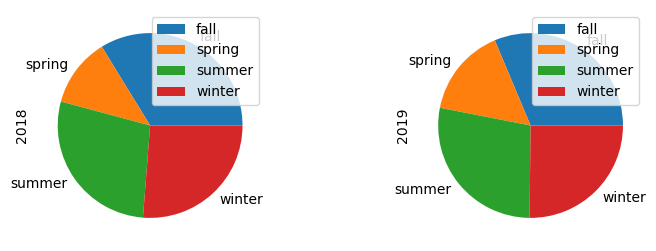

In [547]:
pivotedSeasonalCount = pd.pivot_table(boomBikeDataset,index = 'yearName',columns = 'season',values = 'cnt',aggfunc = 'sum')
pivotedSeasonalCount.reset_index().set_index('yearName').T.plot.pie(subplots=True, figsize=(9, 3))

array([<Axes: ylabel='2018'>, <Axes: ylabel='2019'>], dtype=object)

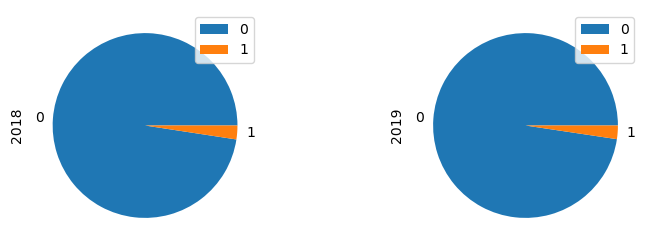

In [548]:
holidayOrNot = pd.pivot_table(boomBikeDataset,index = 'yearName',values = 'cnt',columns = 'holiday',aggfunc = 'sum')
holidayOrNot.reset_index().set_index('yearName').T.plot.pie(subplots=True, figsize=(9, 3))

### Check correlation Between Categorical 

- *Null Hypothesis:* which states that there is no relation between the variables.
- *Alt. Hypothesis:* which states that there is some relation between the variables


In [549]:
holidayOrNot = pd.pivot_table(boomBikeDataset,index = 'yearName',values = 'holiday',columns = 'workingday',aggfunc = 'count')
stat, p, dof, expected = chi2_contingency(holidayOrNot)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [550]:
data = pd.pivot_table(boomBikeDataset,index = 'season',columns = 'weathersit',values = 'holiday',aggfunc = 'count')
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

# Season & weathersit are dependent on each other

p value is 0.02240044098125438
Dependent (reject H0)


In [551]:
# Drop columns which are depedent on each other

boomBikeDataset.drop('weathersit',axis = 1, inplace = True)
boomBikeDataset.drop('mnth',axis = 1, inplace = True)

# Drop weekday as it does not have any direct impact on count
# Dropping workingday as when first time the model was fit, the coefficient of workingday was not significant (as per P value)
boomBikeDataset.drop(['weekday'],axis = 1, inplace = True)

# Drop yearName as it already exists in the dataset

boomBikeDataset.drop('yearName',axis = 1, inplace = True)

In [552]:
boomBikeDataset.head()

,season,yr,holiday,workingday,temp,hum,windspeed,cnt
0,spring,0,0,0,14.110847,80.5833,10.749882,985
1,spring,0,0,0,14.902598,69.6087,16.652113,801
2,spring,0,0,1,8.050924,43.7273,16.636703,1349
3,spring,0,0,1,8.200000,59.0435,10.739832,1562
4,spring,0,0,1,9.305237,43.6957,12.522300,1600


### Create Dummy Variables for Categorical Variables

In [553]:
dummy = pd.get_dummies(boomBikeDataset['season'],dtype = int)
dataForModelling = boomBikeDataset.copy()

# Drop Data for Season & one Dummy Variable
dataForModelling.drop('season',axis = 1, inplace = True)
dataForModelling = pd.concat([dataForModelling,dummy],axis = 1)
dataForModelling.drop('fall',axis = 1, inplace = True)

In [554]:
dataForModelling.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0


### Create Train-Test Split of the Data

In [555]:
df_train, df_test = train_test_split(dataForModelling, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 10)
(220, 10)


### Normalizing the Data

We will be normalizing the data to bring the data in the same scale. For example, the data for Humidity is at a different scale than the data for Temperature or Wind Speed.

Normalization will follow the below formula:

($x$ - $x_{min}$)/($x_{max}$ - $x_{min}$)

In [556]:
scalar = MinMaxScaler()

numeric_var = ['temp','hum','windspeed','cnt']
df_train[numeric_var] = scalar.fit_transform(df_train[numeric_var])
df_train[numeric_var].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Modelling of the Data

- Training the Model
- Testing the Model

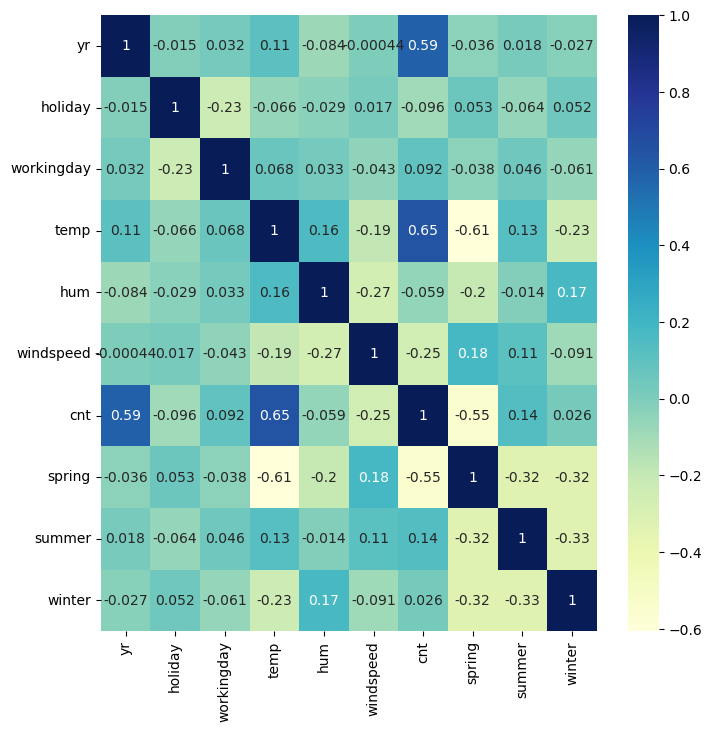

In [557]:
# Create a correlation plot

#correlationData = boomBikeDataset[['temp','atemp','hum','windspeed','cnt']].corr()
plt.figure(figsize = (8,8))
dataplot = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Training the Model using the Linear Regression Model

In [558]:
# X_train & y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [559]:
# Add a constant, since statsmodel does not add a constant by it's own

X_train_sm = sm.add_constant(X_train)

# Create a model
linearRegression = sm.OLS(y_train,X_train_sm)
lr_model = linearRegression.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     222.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.12e-168
Time:                        23:23:02   Log-Likelihood:                 449.15
No. Observations:                 510   AIC:                            -878.3
Df Residuals:                     500   BIC:                            -836.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3512      0.038      9.317      0.000       0.277       0.425
yr             0.2299      0.009     25.264      0.000       0.212       0.248
holiday       -0.0645      0.029     -2.198      0.028      -0.122      -0.007
workingday     0.0141      0.010      1.423      0.155      -0.005       0.034
temp           0.5455      0.036     15.016      0.000       0.474       0.617
hum           -0.3138      0.033     -9.494      0.000      -0.379      -0.249
windspeed     -0.2336      0.028     -8.282      0.000      -0.289      -0.178
spring        -0.0568      0.022     -2.562      0.011      -0.100      -0.013
summer         0.0525      0.015      3.526      0.000       0.023       0.082
winter         0.0987      0.018      5.433      0.000       0.063       0.134
==============================================================================
Omnibus:                       81.949   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.543
Skew:                          -0.807   Prob(JB):                     1.91e-46
Kurtosis:                       5.702   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [560]:
X_train.drop(['holiday','workingday','hum'],axis = 1, inplace = True)

In [561]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,windspeed,4.53
1,temp,3.42
0,yr,2.06
3,spring,1.87
4,summer,1.75
5,winter,1.52


### Final Model

Below is the final created model having loq Vif values as well as p-value falling in the range

In [562]:
# Add a constant, since statsmodel does not add a constant by it's own

X_train_sm = sm.add_constant(X_train)

# Create a model
linearRegression = sm.OLS(y_train,X_train_sm)
lr_model = linearRegression.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     266.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          8.55e-153
Time:                        23:23:03   Log-Likelihood:                 403.89
No. Observations:                 510   AIC:                            -793.8
Df Residuals:                     503   BIC:                            -764.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1695      0.034      4.979      0.000       0.103       0.236
yr             0.2396      0.010     24.317      0.000       0.220       0.259
temp           0.4989      0.039     12.729      0.000       0.422       0.576
windspeed     -0.1745      0.030     -5.836      0.000      -0.233      -0.116
spring        -0.0694      0.024     -2.880      0.004      -0.117      -0.022
summer         0.0422      0.016      2.607      0.009       0.010       0.074
winter         0.0674      0.019      3.456      0.001       0.029       0.106
==============================================================================
Omnibus:                       97.335   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.627
Skew:                          -0.953   Prob(JB):                     6.23e-55
Kurtosis:                       5.849   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis

Residuals are not exactly centered at 0, however, they are pretty close to 0

<Axes: ylabel='Count'>

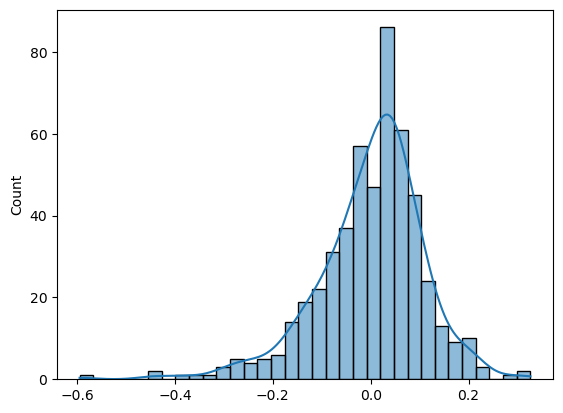

In [563]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train - y_train_pred
sns.histplot(residual,kde = True)

### Prediction & Evaluation on the Test Set

In [564]:
numeric_var = ['temp','hum','windspeed','cnt']
df_test[numeric_var] = scalar.transform(df_test[numeric_var])
df_test[numeric_var].describe()

,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154
std,0.233187,0.148694,0.159584,0.219163
min,0.046591,0.261915,-0.042808,0.048205
25%,0.355429,0.529197,0.198843,0.378595
50%,0.558172,0.625590,0.300126,0.524678
75%,0.755981,0.743798,0.402718,0.677750
max,0.984424,1.002146,0.807474,0.963300


In [565]:
# X_test & y_test

y_test = df_test.pop('cnt')
X_test = df_test

# Dropping variables not to be used for model prediction
X_test.drop(['holiday','workingday','hum'],axis = 1, inplace = True)

# Add a constant, since statsmodel does not add a constant by it's own

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,temp,windspeed,spring,summer,winter
184,1.0,0,0.831783,0.084219,0,0,0
535,1.0,1,0.901354,0.153728,0,1,0
299,1.0,0,0.511964,0.334206,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0


In [570]:
# Predict

y_pred = lr_model.predict(X_test_sm)

The R2 Score on the Model is pretty close to the R2 Score that we have predicting when Training the Model

In [571]:
# Evaluate
r2_score(y_true = y_test, y_pred = y_pred)

0.7554476198935365

### Final Model Equation

Post performing the Data Cleaning, Feature Selection & Model fitting the above model has been finalised that explains about 75% of the variability in the data.
